In [1]:
#for array manipulations
import numpy as np
#for image processing
import cv2 
#for displaying images
import matplotlib.pyplot as plt
#to display images in this notebook, not in a separate window
%matplotlib inline
#to access system resources such as directories
import os

In [10]:
#Set this to point to the project root; all paths will be relative to this one
project_dir = '/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/'

In [11]:
def set_up_directories(project_dir=project_dir):
    """Sets up the paths to important direcoties
    
    Parameters
    ----------
    project_dir : string; default is the current working directory
        The path to the project root i.e '/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/'
    
    returns
    -------
    base_dir : string
        The project directory path
    data_folder : string
        The data subfolder path
    maize_data_folder : 
        The path to the subdirectory containing the maize images
        
    example usage
    -------------
    base_dir, data_folder, maize_data_folder = set_up_directories()
    """
    
    #set our base directory. This should point to the location of the plant-diseases folder
    base_dir = project_dir
    #set the path to our data folder
    data_folder = os.path.join(base_dir, 'data')
    #set the path to the maize folder and list the various categories available
    maize_data_folder = os.path.join(data_folder, 'maize')

    return base_dir, data_folder, maize_data_folder

In [12]:
#Directories set up
base_dir, data_folder, maize_data_folder = set_up_directories()
base_dir, data_folder, maize_data_folder

('/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/',
 '/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/data',
 '/home/lyle/tutorials/AI/scikit-learn/maize-disease-detection/data/maize')

In [13]:
def get_32(disease):
    """Loads 32 images for a given maize disease
    
    parameters
    ----------
    disease: string
        A string that could be common_rust, healthy, leaf_spot, nothern_leaf_blight
    returns
    -------
    disease_images: list
        A list of images for the selected disease
    """
    
    #this list will contain the 20 images returned
    disease_images = []
    #path to the images
    disease_images_path = os.path.join(maize_data_folder, disease)
    for image_path in os.listdir(disease_images_path):
        image_path = os.path.join(disease_images_path, image_path)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        disease_images.append(image)
    return disease_images

In [14]:
common_rust_images = get_32('common_rust')
healthy_images = get_32('healthy')
leaf_spot_images = get_32('leaf_spot')
nothern_leaf_blight_images = get_32('nothern_leaf_blight')

In [15]:
len(common_rust_images)

32

In [16]:
#This function will help us plot 10 images
def plot_images(images, title):
    """Plots 10 images of a particular disease category
    
    parameters
    ----------
    images: list
        List of images(each image is an array)
    title: string
        Title for each image i.e name of disease
    """
    
    plt.figure(figsize=(12,8))
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.show()

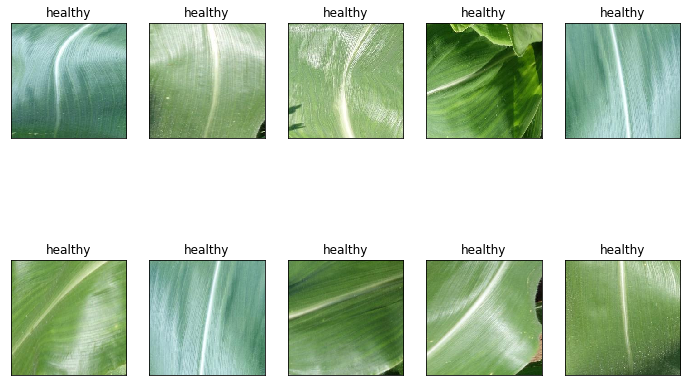

In [17]:
plot_images(healthy_images, 'healthy')

In [18]:
#This function allows us to resize
def resize(image, new_size=(600,600)):
    """Resize the given image
    
    parameters
    ----------
    image : numpy array
        The image to be resized
    new_size : tuple
        The new image size
    returns
    -------
    resized_image : numpy arra
        The resized image
    """
    
    resized_image = cv2.resize(image, new_size)
    return resized_image

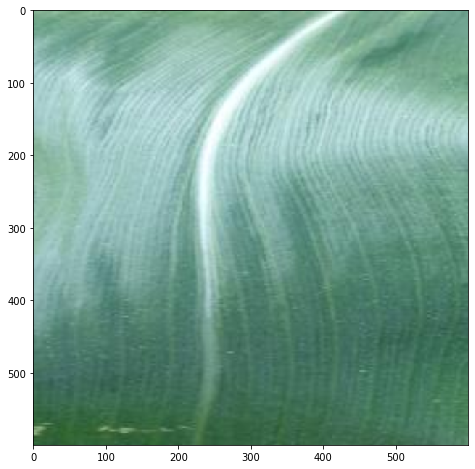

In [20]:
#Resize and show the first image of the healthy category
resized_image = resize(healthy_images[0])
plt.figure(figsize=(12,8))
plt.imshow(resized_image)

In [ ]:
'''
Image thresholding
'''

In [21]:
#Thisfunction enables us to carry out a thresholding operation
def thresh_hold(image):
    """Carries out a binary threshold of a given image
    
    parameters
    ----------
    image : numpy array
        The color image to be operated on
    returns : numpy array
        The binary threshed image
    """
    
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return thresh_binary

#This function plots gray scale images
def plot_grayscale(image):
    """Plots grayscale images
    
    parameters
    ----------
    image : numpy array
        Grayscale image to be plotted
    """
    
    plt.figure(figsize=(12,8))
    plt.imshow(image, cmap='gray')

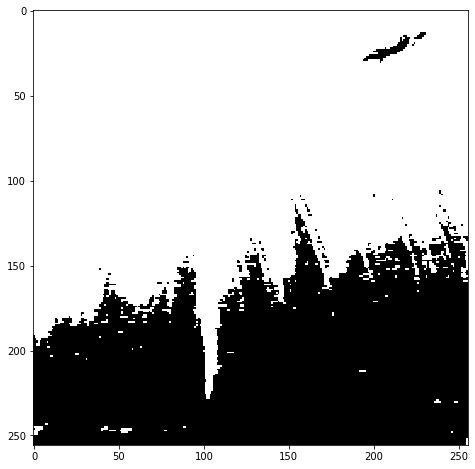

In [22]:
#Visualize a binary threshed image of a healthy leaf
healthy_binary_thresh = thresh_hold(healthy_images[0])
plot_grayscale(healthy_binary_thresh)

In [ ]:
'''
This almost divides the leaf into two portions
'''

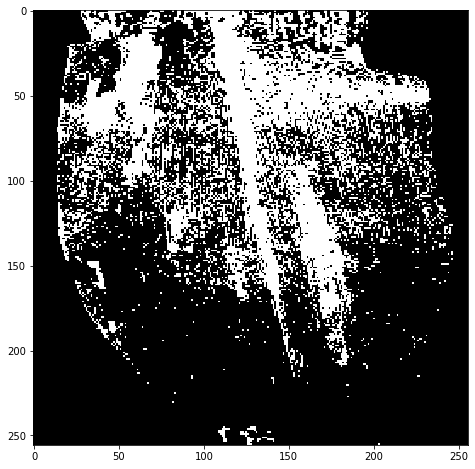

In [23]:
#Visualize a binary threshed image of a leaf infected with common rust
common_rust_binary_thresh = thresh_hold(common_rust_images[0])
plot_grayscale(common_rust_binary_thresh)

In [ ]:
'''
This brings out the spots nicely
'''

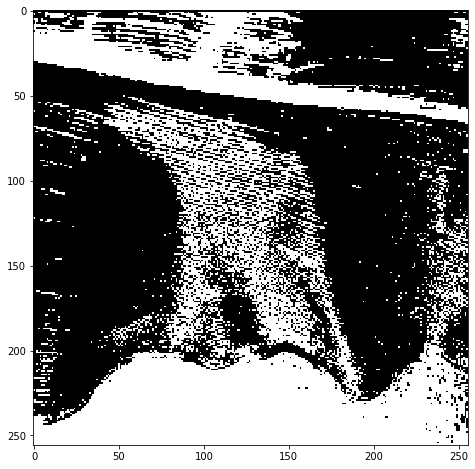

In [24]:
#Visualize a binary threshed image of a leaf infected with leaf spot
leaf_spot_binary_thresh = thresh_hold(leaf_spot_images[0])
plot_grayscale(leaf_spot_binary_thresh)

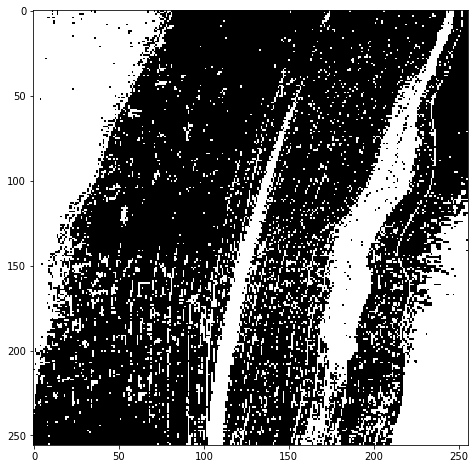

In [25]:
#Visualize a binary threshed image of a leaf infected nothern leaf blight
nothern_leaf_blight_binary_thresh = thresh_hold(nothern_leaf_blight_images[0])
plot_grayscale(nothern_leaf_blight_binary_thresh)

In [ ]:
'''
Each particular leaf looks different under binary thresholding.
The question is how to generate features from this binary thresholding?
'''

In [26]:
#Let us try other thresholding methods
def threshold_all(image):
    """Carries out various thresholding operations on a single image
    
    Binary thresholding, Inverse Binary Thresholding, Truncation threshing, Thresh to Zero,
    Thresh to zero Inverse
    parameters
    ----------
    image : numpy array
        The color image to undergo these thresholding operations
    returns
    -------
    threshold_images : list
        The list of the images after thresholding
    names : list
        The names correspoinding to the threshold images in the threshold_images list
    """
    
    threshold_images = []
    names = []
    
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    threshold_images.append(gray_image)
    names.append('Original Image')
    
    #Binary thresholding
    ret, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    threshold_images.append(thresh_binary)
    names.append('Thresh Binary')
    
    #Inverse Binary thresholding
    ret, thresh_binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
    threshold_images.append(thresh_binary_inv)
    names.append('Thresh Binary Inverse')
    
    ret, thresh_trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
    threshold_images.append(thresh_trunc)
    names.append('Thresh Trunc')
    
    ret, thresh_tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
    threshold_images.append(thresh_tozero)
    names.append('Thresh To Zero')
    
    ret, thresh_tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)
    threshold_images.append(thresh_tozero_inv)
    names.append('Thresh To Zero Inverse')
    
    return threshold_images, names

#This function allows us to plot threshod images
def plot_threshold_images(images, names):
    """Plots the list of thresholded images for comparison
    
    parameters
    ----------
    images : list
        The thresholded images
    names : list
        The corresponding names of the threshold operation
    """
    
    plt.figure(figsize=(16,10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], 'gray')
        plt.title(names[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

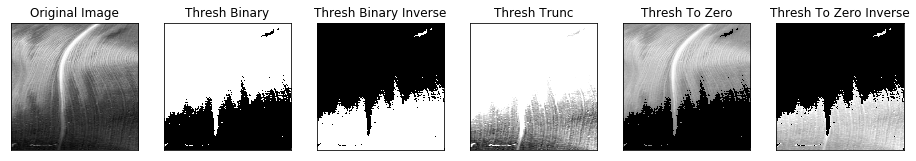

In [27]:
#Various threshold operations visualized on a healthy leaf sample
healthy_images_threshed, healthy_images_threshed_names = threshold_all(healthy_images[0])
plot_threshold_images(healthy_images_threshed, healthy_images_threshed_names)

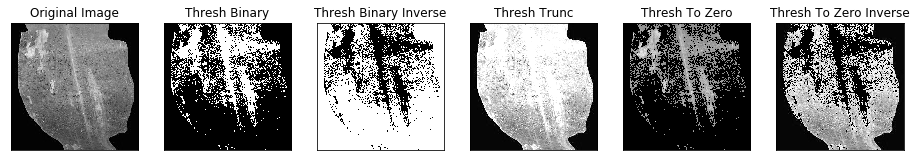

In [28]:
#Various threshold operations visualized on a leaf sample infected with common rust
common_rust_images_threshed, common_rust_images_threshed_names = threshold_all(common_rust_images[0])
plot_threshold_images(common_rust_images_threshed, common_rust_images_threshed_names)

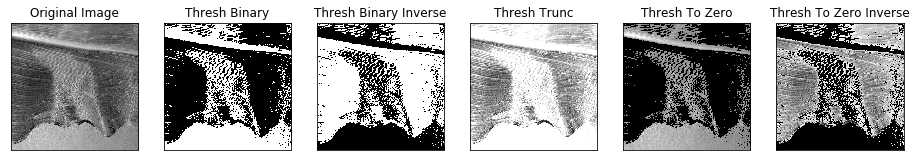

In [29]:
#Various threshold operations visualized on a leaf sample infected with leaf spot
leaf_spot_images_threshed, leaf_spot_images_threshed_names = threshold_all(leaf_spot_images[0])
plot_threshold_images(leaf_spot_images_threshed, leaf_spot_images_threshed_names)

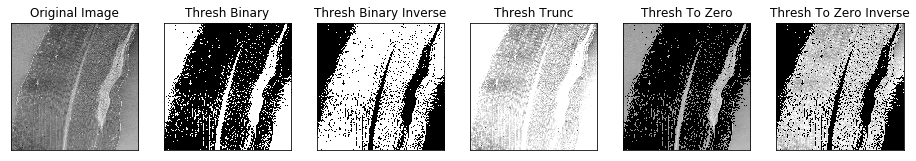

In [30]:
#Various threshold operations visualized on a leaf sample infected with nothern leaf blight
nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names = threshold_all(nothern_leaf_blight_images[0])
plot_threshold_images(nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names)

In [31]:
#Let us try adaptive thresholding
def adaptive_thresholding(image):
    """Carries out adaptive thresholding on the given image
    
    parameters
    ----------
    image : numpy array
        The color image to which adaptive thresholding is to be carried out
    returns
    -------
    threshold_images : list
        The thresholded images
    names : list
        The names of the various adaptive thresholding operations 
    """
    
    threshold_images = []
    names = []
    
    #convert to gray scale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold_images.append(gray_image)
    names.append('Original Image')
    
    #Global thresholding
    ret, thresh_global = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    threshold_images.append(thresh_global)
    names.append('Global Thresholding')
    
    #Adaptive mean thresholding
    thresh_mean = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    threshold_images.append(thresh_mean)
    names.append('Adaptive Mean Thresholding')
    
    #Gaussian Thresholding
    thresh_gaussian = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    threshold_images.append(thresh_gaussian)
    names.append('Adaptive Gaussian Thresholding')
    
    return threshold_images, names

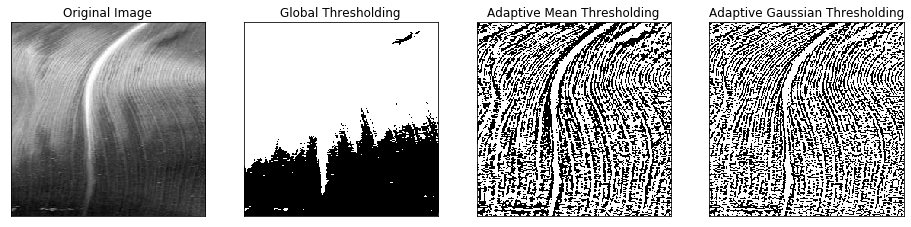

In [33]:
#Various adaptive threshold operations visualized on a healthy leaf sample
healthy_images_threshed, healthy_images_threshed_names = adaptive_thresholding(healthy_images[0])
plot_threshold_images(healthy_images_threshed, healthy_images_threshed_names)

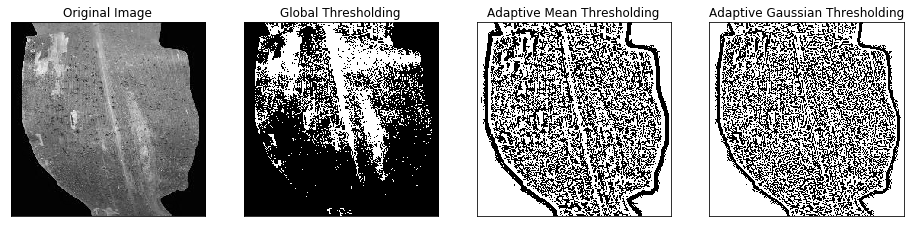

In [34]:
#Various threshold operations visualized on a leaf sample infected with common rust
common_rust_images_threshed, common_rust_images_threshed_names = adaptive_thresholding(common_rust_images[0])
plot_threshold_images(common_rust_images_threshed, common_rust_images_threshed_names)

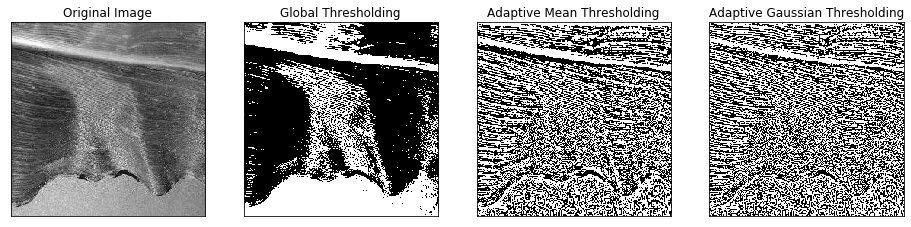

In [35]:
#Various threshold operations visualized on a leaf sample infected with leaf spot
leaf_spot_images_threshed, leaf_spot_images_threshed_names = adaptive_thresholding(leaf_spot_images[0])
plot_threshold_images(leaf_spot_images_threshed, leaf_spot_images_threshed_names)

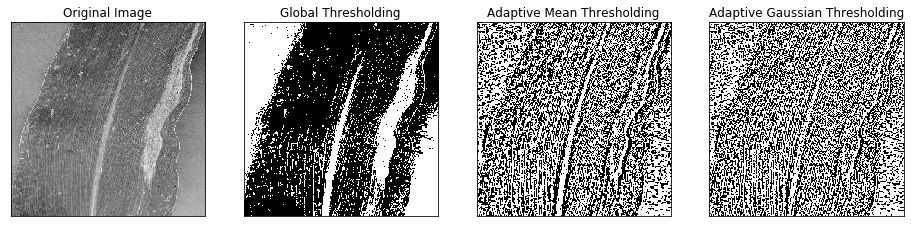

In [36]:
#Various threshold operations visualized on a leaf sample infected with nothern leaf blight
nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names = adaptive_thresholding(nothern_leaf_blight_images[0])
plot_threshold_images(nothern_leaf_blight_images_threshed, nothern_leaf_blight_images_threshed_names)

In [37]:
#Let us try edge detection on the color images
def detect_edges_color(image):
    """Carries out edge detection on color(RGB) image and plots it
    
    Uses the Canny edge detection method
    parameters
    ----------
    image : numpy array
        The image whose edge are to be detected
    """
    
    edges = cv2.Canny(image, 100, 200)
    plt.figure(figsize=(12,8))
    plt.imshow(edges)

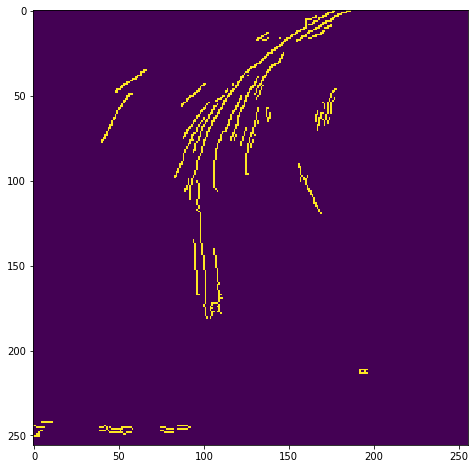

In [39]:
#Edge detection and visualization for a healthy image
detect_edges_color(healthy_images[0])

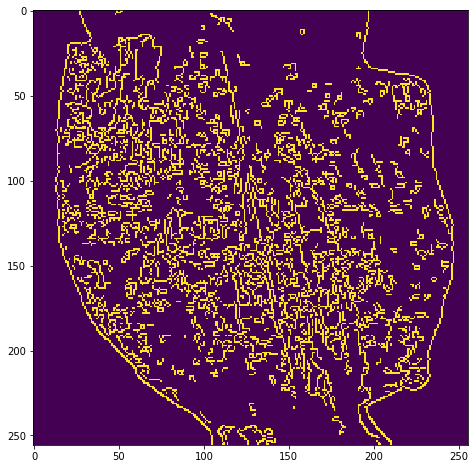

In [40]:
#edge detection and visualization for a leaf infected with common rust
detect_edges_color(common_rust_images[0])

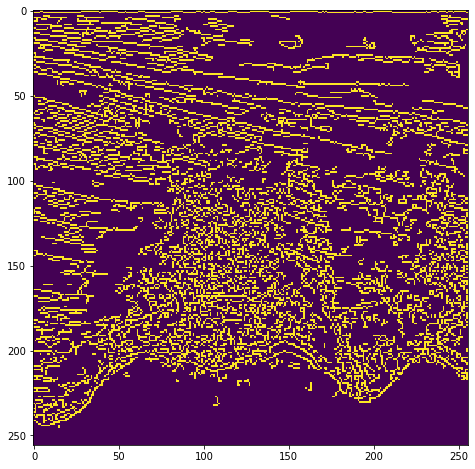

In [41]:
#edge detection and visualization for a leaf infected with leaf spot
detect_edges_color(leaf_spot_images[0])

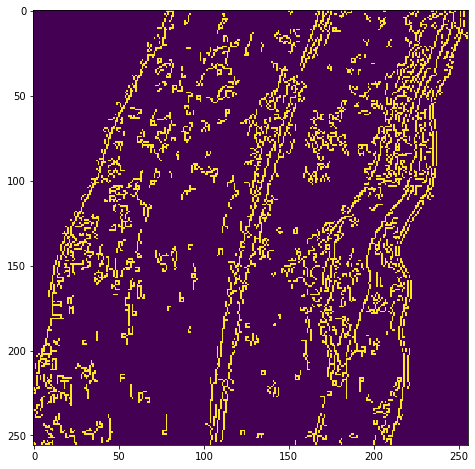

In [42]:
#edge detection and visualization for a leaf infected with nothern leaf blight
detect_edges_color(nothern_leaf_blight_images[0])

In [43]:
#Let us try edge detection on the color images
def detect_edges_gray(image):
    """Carries out edge detection on a grayscale image and plots it
    
    Uses the Canny edge detection method
    parameters
    ----------
    image : numpy array
        The color image whose edge are to be detected
    """
    
    #convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    plt.figure(figsize=(12,8))
    plt.imshow(edges, 'gray')

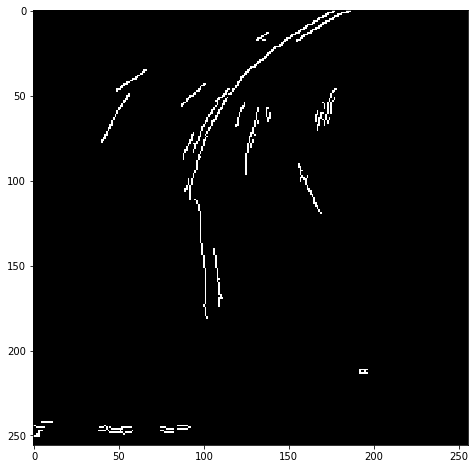

In [44]:
#Edge detection and visualization for a healthy grayscale image
detect_edges_gray(healthy_images[0])

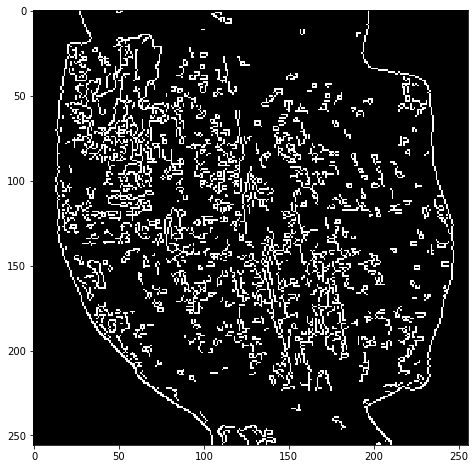

In [45]:
#edge detection and visualization for a leaf infected with common rust
detect_edges_gray(common_rust_images[0])

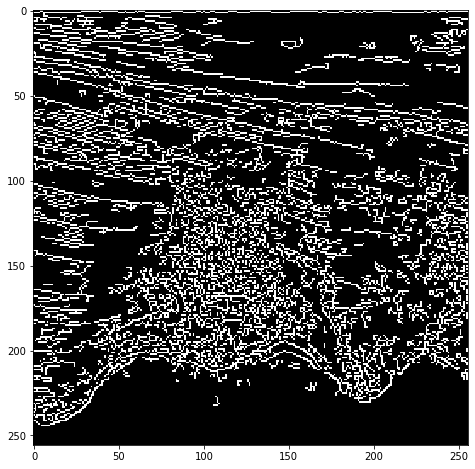

In [46]:
#edge detection and visualization for a leaf infected with leaf spot
detect_edges_gray(leaf_spot_images[0])

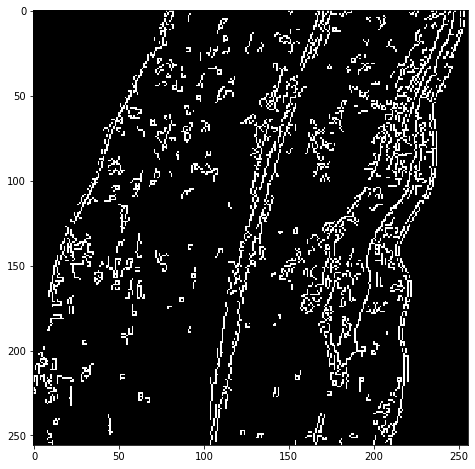

In [47]:
#edge detection and visualization for a leaf infected with nothern leaf blight
detect_edges_gray(nothern_leaf_blight_images[0])

In [48]:
#What about image contours
def detect_contours(image):
    """Detects contours on an image
    
    parameters
    ----------
    image : numpy array
        The image whose contours we want to visualize
    """
    
    #convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #carry out binary thresholding
    ret, thresh = cv2.threshold(gray_image, 127, 255, 0)
    #detect the contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #draw the contours on the original image
    with_contours = cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    #visualize the contours on the original image
    plt.figure(figsize=(12,8))
    plt.imshow(with_contours)

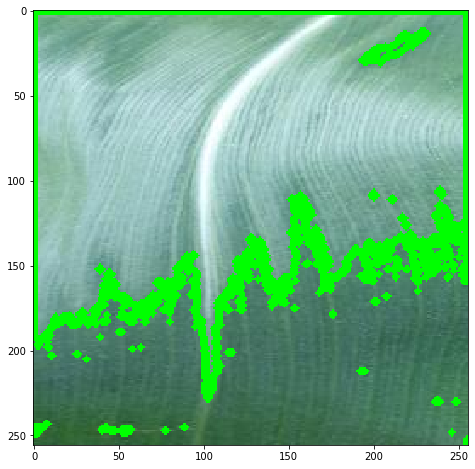

In [49]:
#Contoures detected on a healthy image
detect_contours(healthy_images[0])

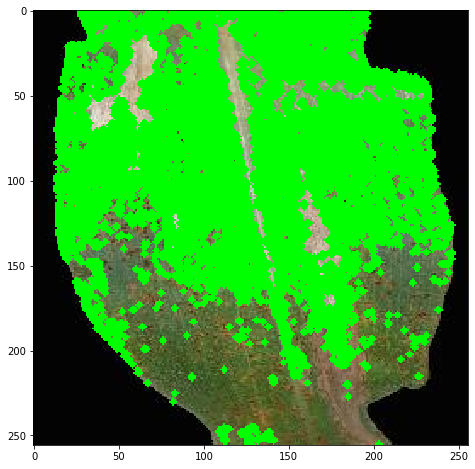

In [50]:
#contours detected on a leaf infected with common rust
detect_contours(common_rust_images[0])

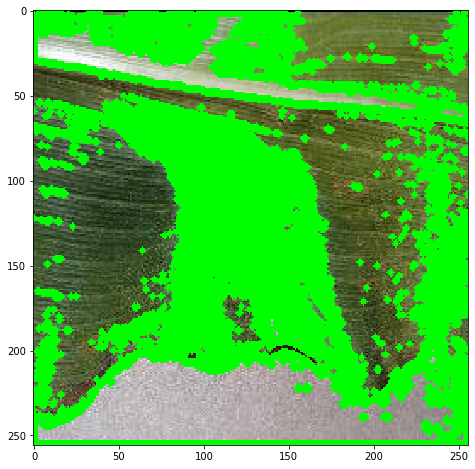

In [51]:
#contours detected on a leaf infected with leaf spot
detect_contours(leaf_spot_images[0])

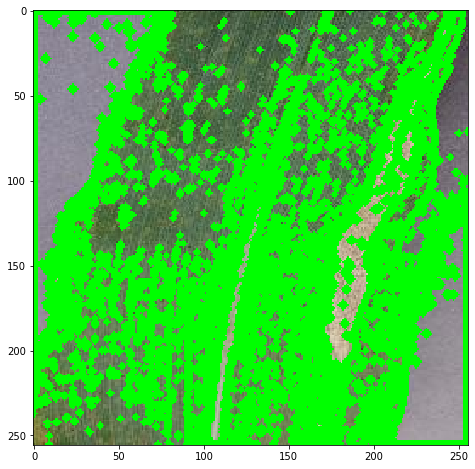

In [52]:
#contours detected on a leaf infected with nothern leaf blight
detect_contours(nothern_leaf_blight_images[0])

In [ ]:
'''
All these techniques show us a lot of information that would be useful in distinguishing
the leafs infected with the different diseases from the healthy leaves. However the means
of encoding such information is quite challenging. For that reason, from here onwards, we
use features generated by orb, kaze and surf algoritms to try and detect the various 
diseases.
'''